# Import data and preliminary data cleaning

In [23]:
import numpy as np
import pandas
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [124]:
df = pandas.read_csv("mushrooms.csv")

In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


It shows that all of them are categorical values. Notice that veil-type only has one category so we drop it.

Check if there is any missing data

In [125]:
del df['veil-type']

In [19]:
print("There are %d missing values." % df.isnull().sum().sum())

There are 0 missing values.


In [24]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

Change categorical variables to numerical ones

In [126]:
encoder = preprocessing.LabelEncoder() 
encoder_names = {}
for column in df.columns: 
    df[column] = encoder.fit(df[column]).transform(df[column])
    encoder_names[column] = dict(zip( encoder.transform(encoder.classes_),encoder.classes_))
    


In [127]:
encoder_names['class']

{0: 'e', 1: 'p'}

1 is poisoness and 0 is eatable

In [50]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,4,1,2


In [54]:
from sklearn.tree import DecisionTreeClassifier
X = df.iloc[:,1:] 
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) 
print("The training sample size is %d and the test sample size is %d.\n" % (len(X_train),len(X_test)))

The training sample size is 6093 and the test sample size is 2031.



# Start fitting

In [56]:
tree_clf= DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
print("Accuracy, training set: {:.3f}".format(tree_clf.score(X_train, y_train)))
print("Accuracy, test set: {:.3f}".format(tree_clf.score(X_test, y_test)))

Accuracy, training set: 1.000
Accuracy, test set: 1.000


In [79]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="mushroom_tree.dot", class_names = ["edible", "poisonous"],              
feature_names = X.columns, rounded = True, filled=True) 


In [102]:
! dot -Tpng mushroom_tree.dot -o mushroom_tree.png

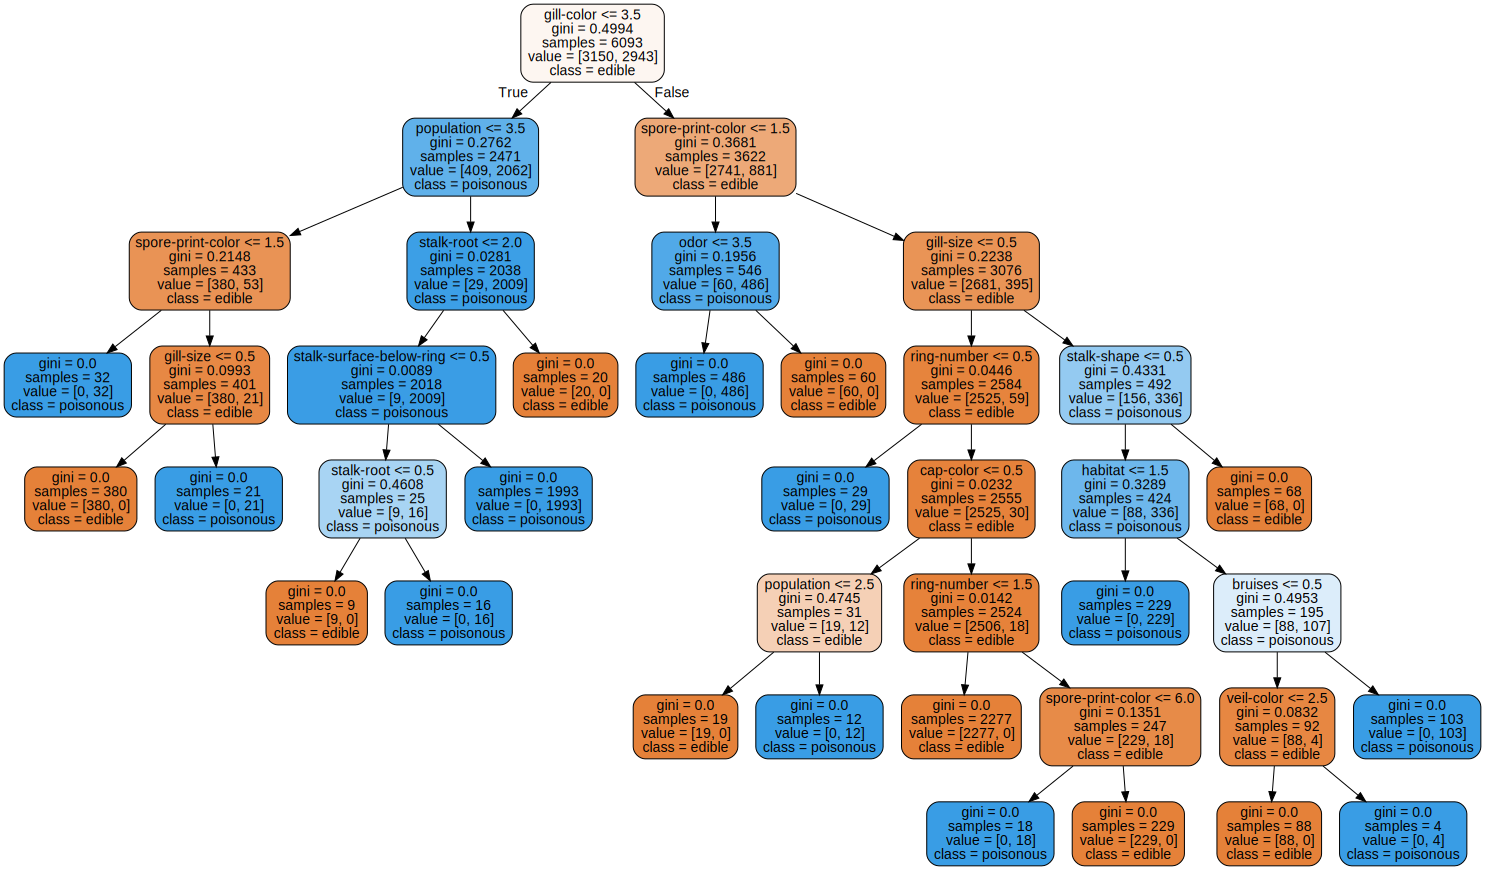

In [80]:
import graphviz
with open("mushroom_tree.dot") as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

In [88]:
# with our selected features
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
print("Accuracy, training set: {:.3f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy, test set: {:.3f}".format(rf_clf.score(X_test, y_test)))

Accuracy, training set: 1.000
Accuracy, test set: 1.000


In [101]:
importance = rf_clf.feature_importances_
features = df.columns[1:]
df_features = DataFrame({'Features': features, 'Importance': importance})
df_features = df_features.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)
df_features.head()

,Features,Importance
0,population,0.140552
1,bruises,0.113383
2,gill-size,0.106586
3,odor,0.105082
4,gill-color,0.090163


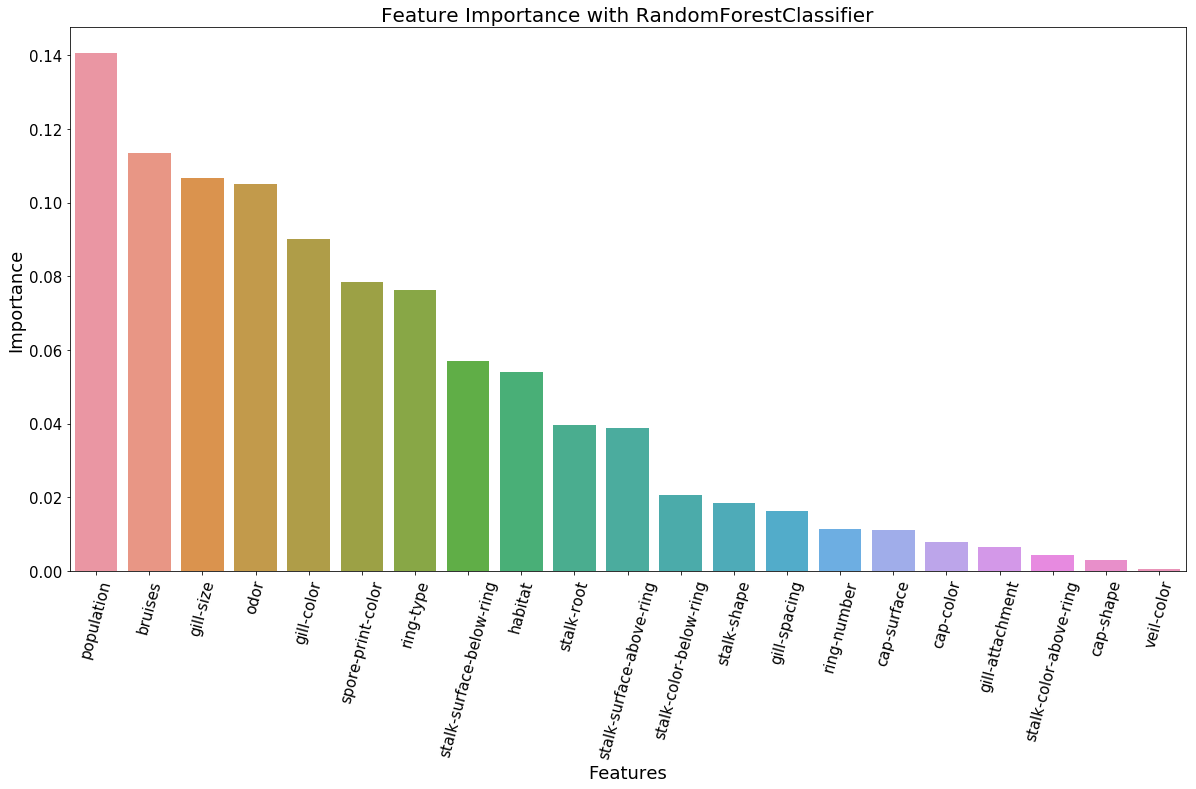

In [116]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance with RandomForestClassifier', fontsize=20)
ax = sns.barplot(data=df_features, x='Features', y='Importance')
ax.tick_params(axis='both', labelsize=15)
plt.xticks(rotation=75)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.show()
plt.savefig("feature_important.png", format='png', dpi=300)

First look at each features and how they are related to poisoness

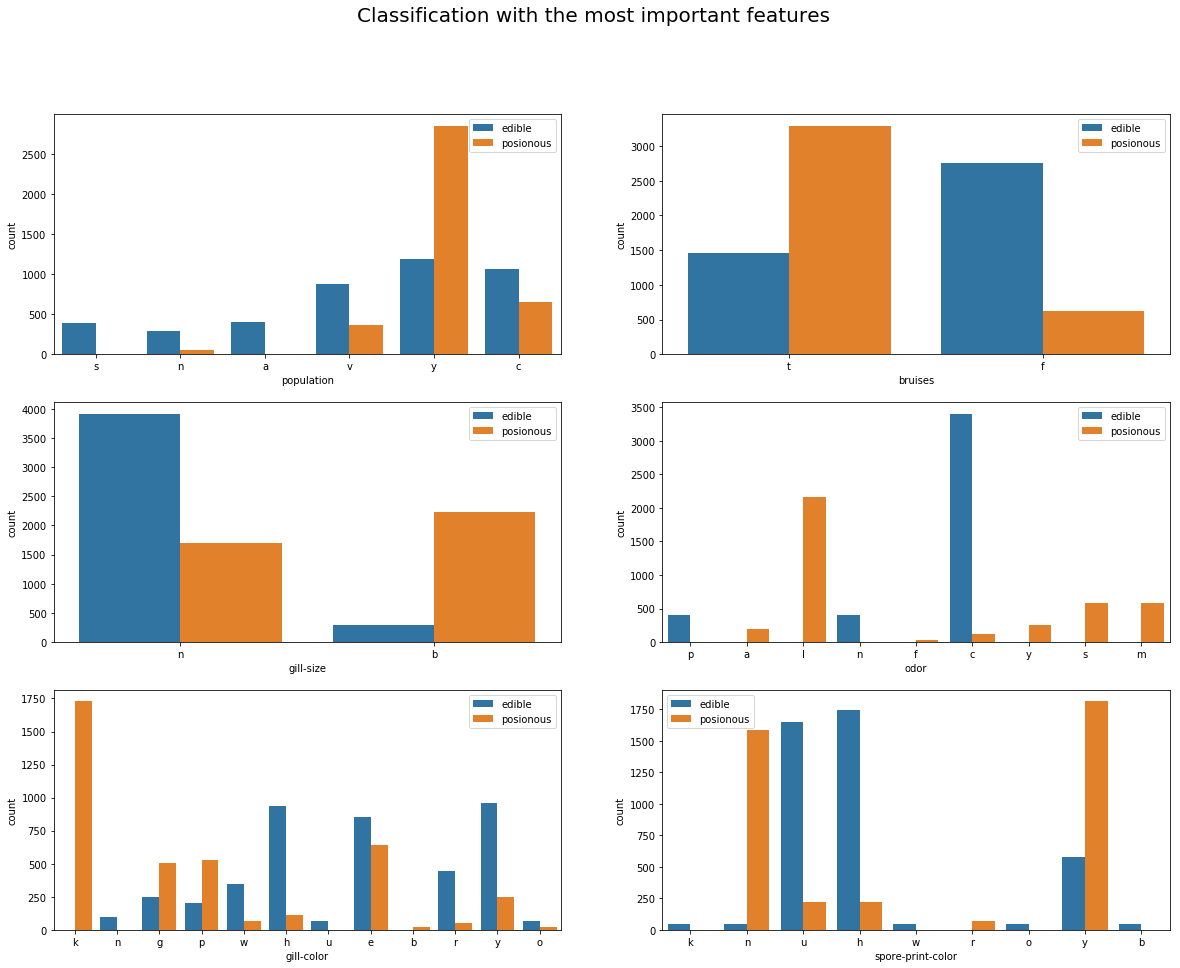

In [132]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Classification with the most important features', fontsize=20)
i = 0
col_important = ['population', 'bruises', 'gill-size', 'odor', 'gill-color', 'spore-print-color']
for r in range(0,3):
    for c in range(0,2):
        feature = col_important[i]
        ax_i = axs[r][c]
        ax = sns.countplot(x=feature, data=df, ax=ax_i, hue='class')
        ax.legend(['edible', 'posionous'], loc='best')
        cates = [encoder_names[feature][key] for key in df[feature].unique()]
        ax.set_xticklabels(cates)
        i +=1
plt.show()
plt.savefig("feature_classification", format='png')